# Analyzing DVD rental project using python(jupyter notebook)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Load CSV files into dataframes
payment_df = pd.read_csv('./data/payment.csv')
customer_df = pd.read_csv('./data/customer.csv')
address_df = pd.read_csv('./data/address.csv')
city_df = pd.read_csv('./data/city.csv')
country_df = pd.read_csv('./data/country.csv')
film_df = pd.read_csv('./data/film.csv')
film_actor_df = pd.read_csv('./data/film_actor.csv')
actor_df = pd.read_csv('./data/actor.csv')
inventory_df = pd.read_csv('./data/inventory.csv')
rental_df = pd.read_csv('./data/rental.csv')

### Time-Series Plot of Daily Total Revenue for Three Different Countries

In [32]:
# Merge dataframes to get relevant information
merged_df = (
    payment_df
    .merge(customer_df, on='customer_id', how='inner', suffixes=('_payment', '_customer'))
    .merge(address_df, on='address_id', how='inner', suffixes=('_customer', '_address'))
    .merge(city_df, on='city_id', how='inner', suffixes=('_address', '_city'))
    .merge(country_df, on='country_id', how='inner', suffixes=('_city', '_country'))
)

In [33]:
# Convert payment_date to datetime format
merged_df['payment_date'] = pd.to_datetime(merged_df['payment_date'])

In [34]:
# Choose three countries for the plot
selected_countries = ['United States', 'China', 'India']
selected_data = merged_df[merged_df['country'].isin(selected_countries)]

In [35]:
# Group by country and payment_date to calculate daily revenue
daily_revenue = selected_data.groupby(['country', 'payment_date']).sum()['amount'].reset_index()

In [36]:
# Pivot the data for plotting
pivot_data = daily_revenue.pivot(index='payment_date', columns='country', values='amount')

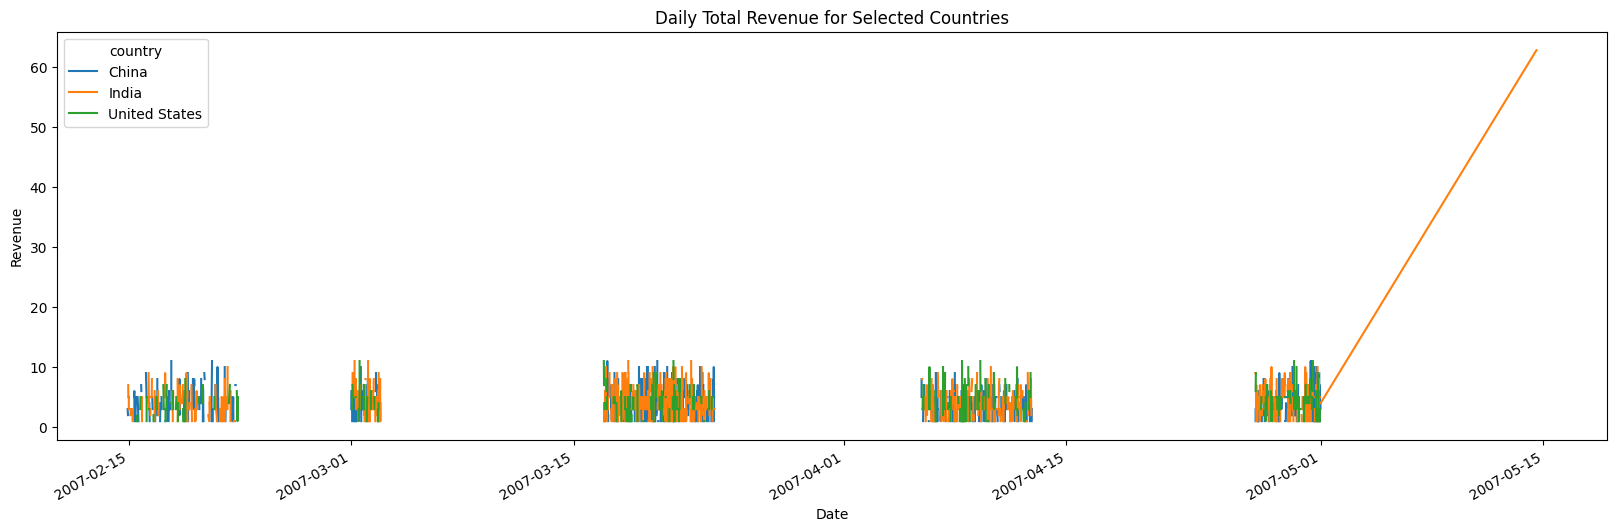

In [37]:
# Create the time-series plot
pivot_data.plot(figsize=(20, 6))
plt.title('Daily Total Revenue for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

### Sentiment Analysis on Movie Descriptions

In [38]:
from textblob import TextBlob

In [39]:
# Define a sentiment analysis function using lambda
sentiment_analysis = lambda text: TextBlob(text).sentiment.polarity

In [40]:
# Apply sentiment analysis and create a new column
film_df['sentiment_score'] = film_df['description'].apply(sentiment_analysis)
film_df['sentiment_classification'] = np.where(film_df['sentiment_score'] > 0, 'Positive', 'Negative')

In [41]:
# Display the DataFrame to see the sentiment column
film_df

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext,sentiment_score,sentiment_classification
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...,-0.0500,Negative
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,"{""Behind the Scenes""}",'australia':18 'cat':8 'drama':5 'epic':4 'exp...,0.1000,Positive
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,{Trailers},'airport':1 'ancient':18 'confront':14 'epic':...,0.0250,Positive
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,{Trailers},'boat':20 'bright':1 'conquer':14 'encount':2 ...,-0.1000,Negative
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,-0.2625,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58.951,"{Trailers,""Behind the Scenes""}",'administr':12 'boat':8 'boy':17 'databas':11 ...,0.0750,Positive
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58.951,"{Trailers,""Behind the Scenes""}",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...,0.2500,Positive
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58.951,"{""Deleted Scenes""}",'boy':16 'canadian':19 'compos':8 'core':2 'fa...,-0.1000,Negative
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58.951,"{Trailers,""Deleted Scenes""}",'ancient':19 'boat':11 'china':20 'discov':14 ...,0.0000,Negative


In [13]:
# Save the updated data back to the CSV file if needed(uncomment the next line of code)
# film_data.to_csv("film_with_sentiment.csv", index=False)

### Visualization of Revenue by Country

In [14]:
# Merge payments and countries dataframes
revenue_by_country = (
    payment_df
    .merge(customer_df, on='customer_id', how='inner', suffixes=('_payment', '_customer'))
    .merge(address_df, on='address_id', how='inner', suffixes=('_customer', '_address'))
    .merge(city_df, on='city_id', how='inner', suffixes=('_address', '_city'))
    .merge(country_df, on='country_id', how='inner', suffixes=('_city', '_country'))
)

In [48]:
# Group by country to calculate total revenue
revenue_by_country = revenue_by_country.groupby('country').sum()['amount'].reset_index()

In [49]:
# Define revenue categories using np.select() and lambda
revenue_conditions = [
    (revenue_by_country['amount'] > 5000),
    (revenue_by_country['amount'] > 2000),
    (revenue_by_country['amount'] <= 2000)
]

revenue_labels = ['High Revenue', 'Medium Revenue', 'Low Revenue']

revenue_by_country['revenue_category'] = np.select(revenue_conditions, revenue_labels)

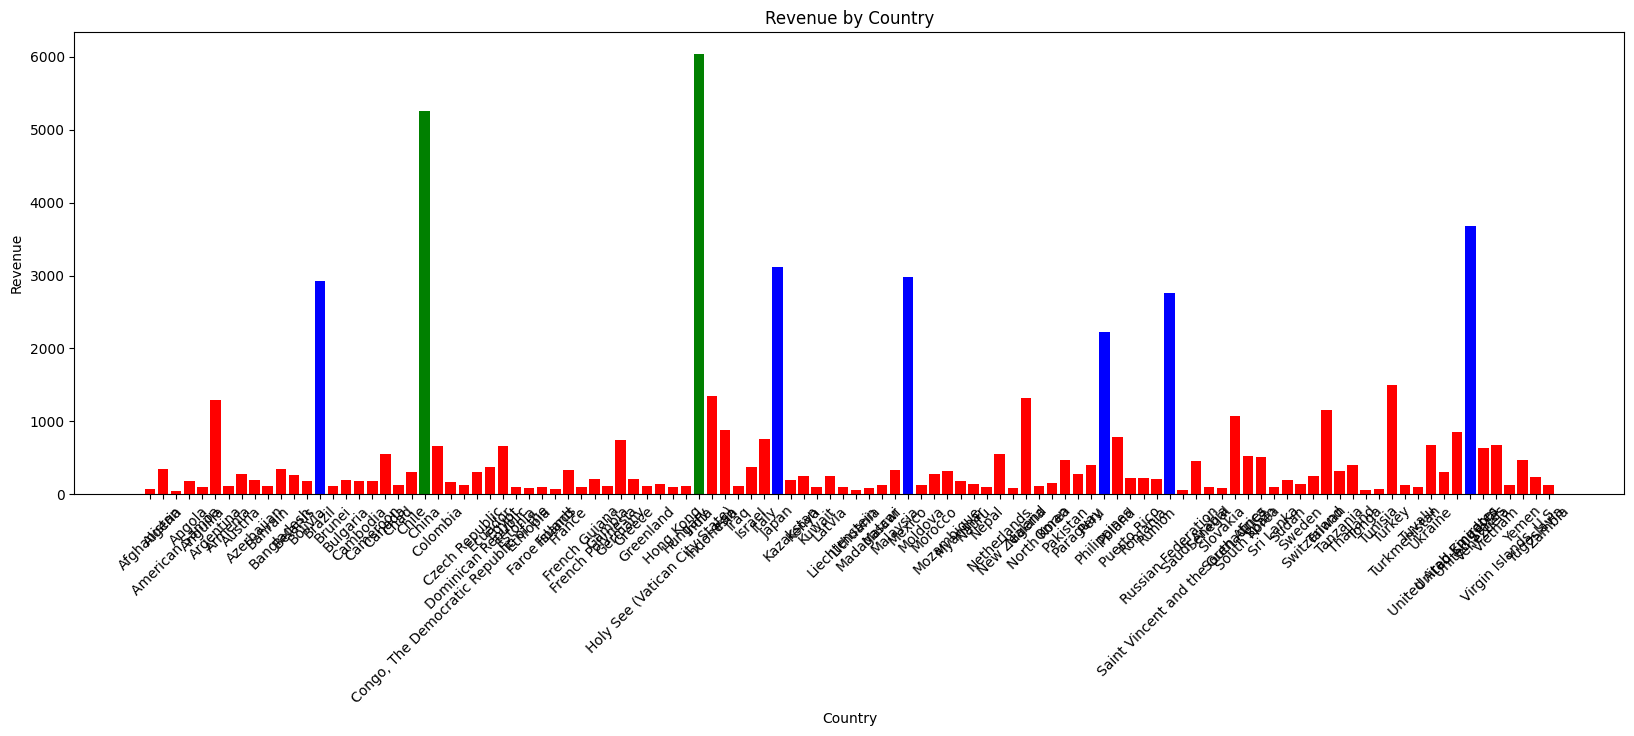

In [50]:
# Create a bar plot
plt.figure(figsize=(20, 6))
plt.bar(revenue_by_country['country'], revenue_by_country['amount'], color=revenue_by_country['revenue_category'].map({
    'High Revenue': 'green', 'Medium Revenue': 'blue', 'Low Revenue': 'red'
}))
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### Analysis of Actors' Revenue(Top 10)

In [42]:
# Merge actors and film_actor dataframes
actor_revenue = (
    actor_df
    .merge(film_actor_df, on='actor_id', how='inner', suffixes=('_actor', '_film_actor'))
    .merge(film_df, on='film_id', how='inner', suffixes=('_film_actor', '_film'))
    .merge(inventory_df, on='film_id', how='inner', suffixes=('_film', '_inventory'))
    .merge(rental_df, on='inventory_id', how='inner', suffixes=('_inventory', '_rental'))
    .merge(payment_df, on='rental_id', how='inner', suffixes=('_rental', '_payment'))
)

In [45]:
# Group by actor and calculate total revenue
actor_revenue = actor_revenue.groupby(['actor_id', 'first_name', 'last_name']).sum()['amount'].reset_index()

In [46]:
# Get top 10 actors by revenue
top_actors = actor_revenue.nlargest(10, 'amount')

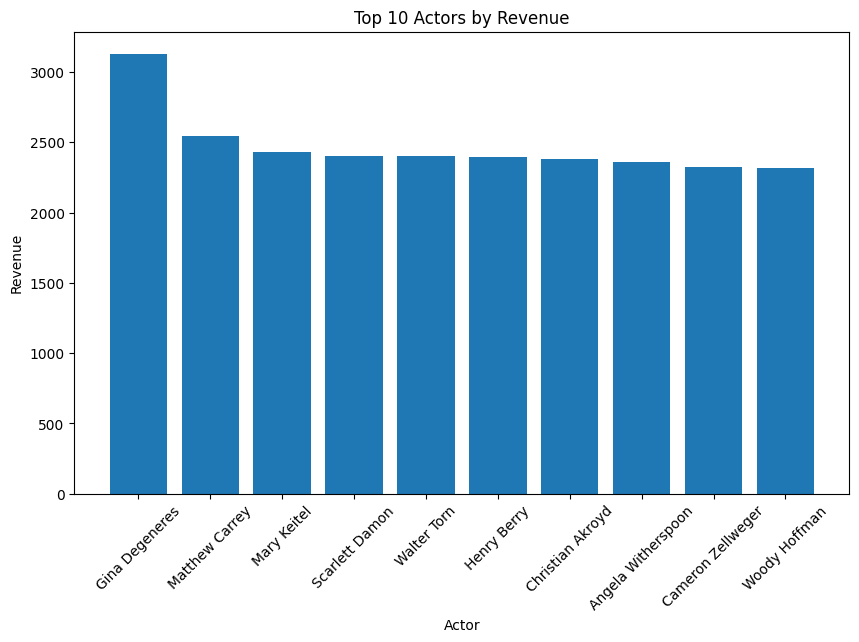

In [47]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_actors['first_name'] + ' ' + top_actors['last_name'], top_actors['amount'])
plt.title('Top 10 Actors by Revenue')
plt.xlabel('Actor')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### Country Classification

In [21]:
countryNames= [
        'Australia', 'Austria', 'Canada', 'France', 'Germany', 'Japan', 'Netherlands', 'Switzerland', 'United Kingdom', 'United States',  # Category A - Advanced Economies
        'China', 'India', 'Indonesia', 'Malaysia', 'Philippines', 'South Korea', 'Thailand', 'Vietnam',  # Category B - Emerging Markets - Asia
        'Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru',  # Category C - Emerging Markets - Latin America
        'Belarus', 'Czech Republic', 'Hungary', 'Poland', 'Russia', 'Ukraine',  # Category D - Emerging Markets - Eastern Europe
        'Algeria', 'Angola', 'Ethiopia', 'Kenya', 'Morocco', 'Nigeria', 'South Africa', 'Sudan', 'Uganda',  # Category E - Developing Economies - Africa
        'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Jordan', 'Saudi Arabia', 'United Arab Emirates', 'Yemen',  # Category F - Developing Economies - Middle East
        'Bangladesh', 'Cambodia', 'Madagascar', 'Myanmar', 'Nepal', 'Pakistan', 'Tanzania', 'Zambia',  # Category G - Developing Economies - Others
        'American Samoa', 'Faroe Islands', 'Greenland', 'Maldives', 'Nauru', 'Tonga', 'Tuvalu',  # Category H - Small Island Nations
    ]

classifications= [
        'Advanced Economies',
        'Advanced Economies',
        'Advanced Economies',
        'Advanced Economies',
        'Advanced Economies',
        'Advanced Economies',
        'Advanced Economies',
        'Advanced Economies',
        'Advanced Economies',
        'Advanced Economies',
        'Emerging Markets - Asia',
        'Emerging Markets - Asia',
        'Emerging Markets - Asia',
        'Emerging Markets - Asia',
        'Emerging Markets - Asia',
        'Emerging Markets - Asia',
        'Emerging Markets - Asia',
        'Emerging Markets - Asia',
        'Emerging Markets - Latin America',
        'Emerging Markets - Latin America',
        'Emerging Markets - Latin America',
        'Emerging Markets - Latin America',
        'Emerging Markets - Latin America',
        'Emerging Markets - Latin America',
        'Emerging Markets - Eastern Europe',
        'Emerging Markets - Eastern Europe',
        'Emerging Markets - Eastern Europe',
        'Emerging Markets - Eastern Europe',
        'Emerging Markets - Eastern Europe',
        'Emerging Markets - Eastern Europe',
        'Developing Economies - Africa',
        'Developing Economies - Africa',
        'Developing Economies - Africa',
        'Developing Economies - Africa',
        'Developing Economies - Africa',
        'Developing Economies - Africa',
        'Developing Economies - Africa',
        'Developing Economies - Africa',
        'Developing Economies - Africa',
        'Developing Economies - Middle East',
        'Developing Economies - Middle East',
        'Developing Economies - Middle East',
        'Developing Economies - Middle East',
        'Developing Economies - Middle East',
        'Developing Economies - Middle East',
        'Developing Economies - Middle East',
        'Developing Economies - Middle East',
        'Developing Economies - Others',
        'Developing Economies - Others',
        'Developing Economies - Others',
        'Developing Economies - Others',
        'Developing Economies - Others',
        'Developing Economies - Others',
        'Developing Economies - Others',
        'Developing Economies - Others',
        'Small Island Nations',
        'Small Island Nations',
        'Small Island Nations',
        'Small Island Nations',
        'Small Island Nations',
        'Small Island Nations',
        'Small Island Nations',
    ]

country_classification = pd.DataFrame({
    'country': countryNames,
    'classification': classifications
})

In [22]:
# Merge country_classification with countries dataframe
countries_with_classification = pd.merge(country_df, country_classification, on='country', how='left')

In [23]:
# Display the DataFrame to see the classification column
countries_with_classification

,country_id,country,last_update,classification
0,1,Afghanistan,2006-02-15 09:44:00,NaN
1,2,Algeria,2006-02-15 09:44:00,Developing Economies - Africa
2,3,American Samoa,2006-02-15 09:44:00,Small Island Nations
3,4,Angola,2006-02-15 09:44:00,Developing Economies - Africa
4,5,Anguilla,2006-02-15 09:44:00,NaN
...,...,...,...,...
104,105,Vietnam,2006-02-15 09:44:00,Emerging Markets - Asia
105,106,"Virgin Islands, U.S.",2006-02-15 09:44:00,NaN
106,107,Yemen,2006-02-15 09:44:00,Developing Economies - Middle East
107,108,Yugoslavia,2006-02-15 09:44:00,NaN
